# Example 2: Linear and polynomial regression


The purpose of this tutorial is to learn about multivariate linear models (with several explanatory variables). This example is an application of a multivariate linear regression on Boston neighborhood housing data, available in the `sklearn.datasets` module. 

For this tutorial, we will need the following modules:

In [14]:
from sklearn.preprocessing import PolynomialFeatures # add polynomial terms in a regression
from sklearn.preprocessing import StandardScaler # standardize the variables
from sklearn.model_selection import train_test_split # split a sample in 2 sub-samples (training-test)
from sklearn.datasets import load_boston # load boston dataset
from sklearn.linear_model import SGDRegressor # linear regression (stochastic gradient descent)
from sklearn.linear_model import LinearRegression # linear regression (OLS, normal equation)
from sklearn.metrics import r2_score # compute R2 (see previous tutorial)
from sklearn.metrics import mean_squared_error # compute mean squared error
from sklearn.pipeline import make_pipeline # create pipelines
from sklearn.model_selection import cross_val_score # cross validation scores
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1) Boston dataset

Boston data is available by default in the library, via the `load_boston` function of the datasets module.

In [15]:
data = load_boston()

The `data` object obtained with this function contains several elements, which can be displayed with the `keys()` function. The `data` element contains the $x_j$ variables, `target` contains the $y$ variable, `feature_names` contains the names of the variables, `DESCR` contains a description of the data, and `filename` gives the path to the file containing the Boston data.

In [16]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

We create an object `X`, containing variables to be explained, and an object `y`, containing

In [17]:
X = data.data # input variables in X
y = data.target # output variable in y

You can also display the description of the data, their dimensions, and the name of the variables.

In [18]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [19]:
print(X.shape)
print(data.feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


(optional) One can also concatenate `X` and `y`, and convert them into a DataFrame (pandas library). This can be useful to access some functions of pandas and matplotlib (see histograms below).

In [20]:
colnames = np.append(data.feature_names, "MEDV") # nparray containing columns names
df = pd.DataFrame(np.c_[X,y], columns = (colnames)) # bind X and y and convert into DataFrame

In [21]:
df.describe() # some statistics 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [22]:
df.head() # first rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


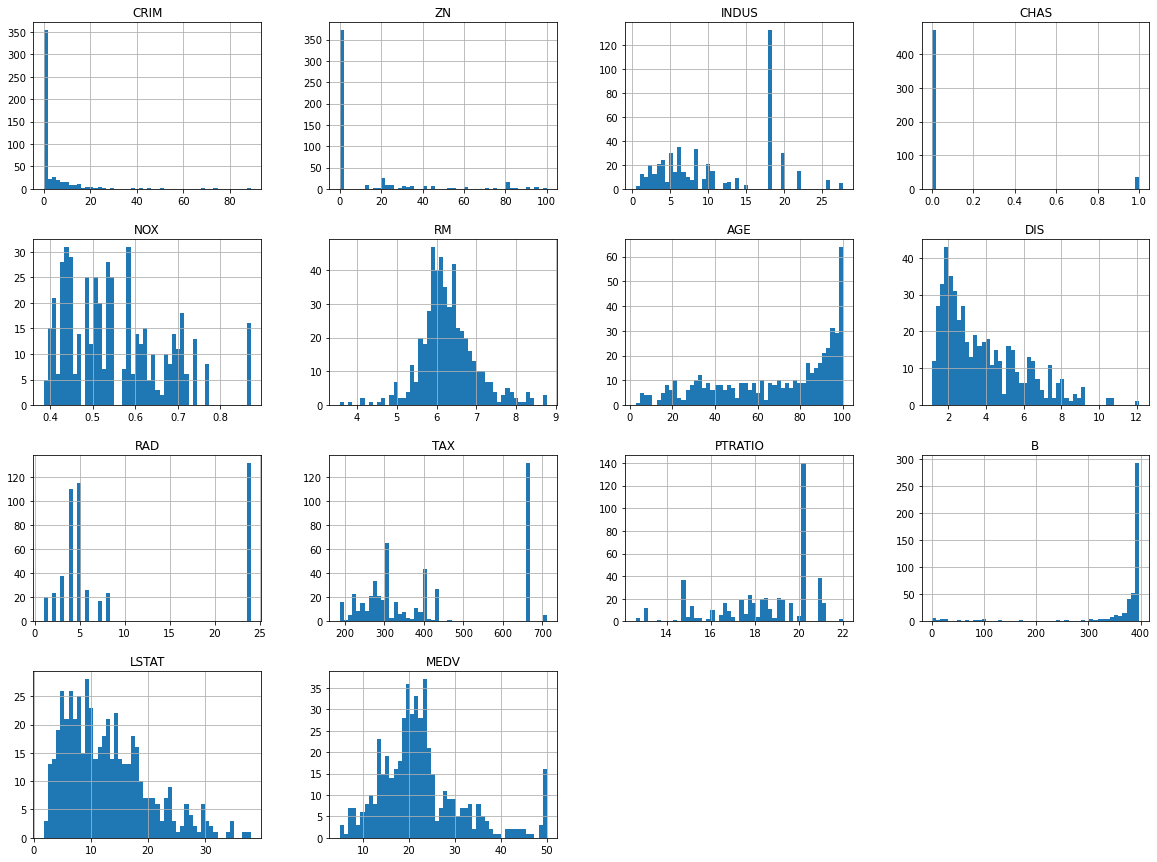

In [23]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

In order to evaluate the quality of our future models, we separate the sample into two subsamples, the training sample and the test sample. This separation is applied simultaneously on `X` and `y`, via the `train_test_split()` function. The parameters of the regression model will be estimated using the training sample, the prediction and the evaluation of the model will be performed using the test sample.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 123)

- `X_train` corresponds to the training sample (80% of the observations of the dataset).
- `X_test` corresponds to the test sample (20% of the observations of the data set).
- `y_train` contains the values of the variable to be explained ('MEDV') of the observations in `X_train`.
- `y_test` contains the values of the variables to explain ('MEDV') of the observations in `X_train`.

## 2) Linear regression (ordinary least squares)

Let's start by estimating a linear regression model by the method of linear least squares on our training sample:

In [25]:
# select a model
linreg = LinearRegression() 

# fit the model 
linreg.fit(X_train,y_train)

LinearRegression()

In [26]:
# (R-squared)
print("R2", linreg.score(X_train,y_train))

R2 0.7559380876016175


In [27]:
# Coefficients  
print("Coefficients", linreg.coef_)

Coefficients [-9.87931696e-02  4.75027102e-02  6.69491841e-02  1.26954150e+00
 -1.54697747e+01  4.31968412e+00 -9.80167937e-04 -1.36597953e+00
  2.84521838e-01 -1.27533606e-02 -9.13487599e-01  7.22553507e-03
 -5.43790245e-01]


In [28]:
# Constant
print("Constant", linreg.intercept_)

Constant 31.835164121206386


In order to evaluate the model, we need to predict the values of the variable $y$ for the observations of the test sample (these obervations were not used to estimate the above parameters). We will note this estimate $\hat{y}$.

In [29]:
y_pred = linreg.predict(X_test) # predict values of y for the test sample

print(y_pred)

[16.00330023 27.79447431 39.26769478 18.32613556 30.45487494 37.67724152
 25.28488162 10.22712629 14.82537224 31.99311717 28.98969206 19.17253244
 13.77310754 31.69400164 16.51057791 21.43127305 20.36911404 37.50141667
 18.10978575 15.81266015 13.80299258 24.48033748 32.93389583 39.42064642
 31.48120599 22.36455033 17.60924332 20.94828713 23.4130816  20.38151773
 25.79402412 34.04473076 15.11357401 21.91097373 24.05551144 34.58404676
 29.34099148 18.2535874  13.95709552 38.23179838 31.0049878  18.74606681
 19.72857941 40.31936227  8.19674997 27.30047872 19.28830095 25.58425976
 15.4961129  25.86694355 34.87324014 24.25453569 19.61772711 12.47561892
 24.42804102 17.9505124   9.69615055  2.3378285  31.80311538 13.65050017
 20.05798605 22.5516387  20.0245067  17.85753966 25.0631636  27.19590817
 25.97988145 22.09920138 24.66187205 30.39210736 20.40773803 28.56421717
 15.32650231 24.51102542 19.64891977 18.27221528 17.81706469 16.75705603
 28.93420488 -0.78820782 32.57992382 12.60054661 25

We can now calculate the coefficient of determination $R^2$ and the mean squared error (MSE). 

$$ R^2 = 1 - \frac{\sum_{i=1}^{n_{test}} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n_{test}} (y_i - \bar{y})^2}$$

$$ MSE = \frac{1}{n_{test}}\sum_{i=1}^{n_{test}} (y_i - \hat{y}_i)^2$$

In [30]:
print("R-squared", r2_score(y_test,y_pred))
print("MSE", mean_squared_error(y_test, y_pred)) 

R-squared 0.6592466510354097
MSE 28.192485758469548


## 3) Linear regression (stochastic gradient descent)

Here, we use the gradient descent algorithm to estimate the parameters of the linear model. This algorithm is iterative and requires the choice of the learning rate (noted here `eta0`). It is preferable to standardize the data to facilitate the convergence of this algorithm, for that we can create a "pipeline", which allows to define a succession of tasks to be performed. By default, the function `SGDRegressor()` considers a regularized regression, that is to say that the regularization parameter is not null, it is noted `alpha`.

In [31]:
valeurs = [.01, 0.005, 0.001, .0005]

for i in valeurs:
    # create a pipeline (standardization followed by unregularized SGD)
    sgdreg = make_pipeline(StandardScaler(),
                     SGDRegressor(alpha = 0, eta0 = i))
    # fit the model
    sgdreg.fit(X_train,y_train)
    # (R-squared)
    print("R2", sgdreg.score(X_train,y_train))
    y_pred = sgdreg.predict(X_test)
    print("R-squared", r2_score(y_test,y_pred))

R2 0.7535866639667201
R-squared 0.6551078704137976
R2 0.75239049146571
R-squared 0.6503851662205686
R2 0.751488852587852
R-squared 0.647920449393216
R2 0.7479911113530981
R-squared 0.6420328216396851


In [32]:
# Coefficients 
sgdreg['sgdregressor'].coef_

array([-0.69955851,  0.64156042, -0.16538357,  0.35631375, -0.91001273,
        3.45937775, -0.17743803, -2.13038811,  0.90700941, -0.6574582 ,
       -1.80735862,  0.68922395, -3.5677088 ])

In [33]:
# Constant
print("Constante", sgdreg['sgdregressor'].intercept_)

Constante [22.25293902]


In the same way as before, in order to evaluate the model, we need to calculate the values of $\hat{y}$. This allows us to evaluate the model on the test sample.

In [34]:
y_pred = sgdreg.predict(X_test)
print("R-squared", r2_score(y_test,y_pred))
print("MSE", mean_squared_error(y_test, y_pred))

R-squared 0.6420328216396851
MSE 29.616684938205616


## 4) Polynomial regression

The performance of a regression model can be improved by adding non-linearities. Polynomial regression is done by the same method, by adding **polynomial features*. This step is added in the pipeline, before the standardization step. The `degree` parameter allows to control the degree of the polynomial.

In [35]:
# pipeline (polynom of degree 2, standardization, SGD)
polyreg = make_pipeline(PolynomialFeatures(degree = 2), # increase the degree coulb be interesting...
                     StandardScaler(),
                     SGDRegressor(alpha = 0, eta0 = 0.01)) # eta0 is the learning rate

# fit the model
polyreg.fit(X_train,y_train)

# (R-squared)
print("R2", polyreg.score(X_train,y_train))

R2 0.8899367041154995


The prediction and evaluation of the model is also done with the test sample.

In [36]:
y_pred = polyreg.predict(X_test)

print("R-squared", r2_score(y_test,y_pred))
print("MSE", mean_squared_error(y_test, y_pred))

R-squared 0.7761156213056414
MSE 18.523243211148632


One can also use ordinary least squares estimation. In this case, we remove the standardization step in the pipeline.

In [37]:
# pipeline (polynom of degree 2, standardization, SGD)
polyreg = make_pipeline(PolynomialFeatures(degree = 2),
                     LinearRegression())

# fit the model
polyreg.fit(X_train,y_train)

# (R-squared)
print("R2", polyreg.score(X_train,y_train))

R2 0.9345654809736516


In [38]:
y_pred = polyreg.predict(X_test)

print("R-squared", r2_score(y_test,y_pred))
print("MSE", mean_squared_error(y_test, y_pred))

R-squared 0.824077795246448
MSE 14.555056515757002


## 5) Evaluating a model by cross-validation

Another way to evaluate the model than the train-test split is the **cross validation**. Here is an example of the calculation of the MSE (negative, which must be made positive) by cross-validation:

In [39]:
poly_scores = -cross_val_score(polyreg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)

# sorted(sklearn.metrics.SCORERS.keys())

As the validation is repeated 10 times (`cv = 10`), we obtain a list of 10 values, we will consider the average of its values:

In [40]:
print(poly_scores)

[ 8.90191598 15.46104383  6.62872642 13.50004653 18.09755446 15.95380656
  5.56628442 11.23228097 52.96208259 27.14498551]


In [41]:
print(np.mean(poly_scores))

17.544872729668374


We can do the same for the linear regression model `linreg` and compare the two models.

In [42]:
lin_scores = -cross_val_score(linreg, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
print(np.mean(lin_scores))

22.572821796132082


If one wants to choose a model (before computing the test error), the one that minimizes the mean square error seems to be the second order polynomial regression. Can we obtain better performance by considering a higher degree of polynomial?

## Exercise

Reproduce this example on another data set.